In [2]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

In [4]:
#Student Performance Data Set
students = pd.read_csv('StudentPerformanceFactors.csv', sep=",")

In [5]:
students.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Text(0.02, 0.9, '$R^2=0.20$')

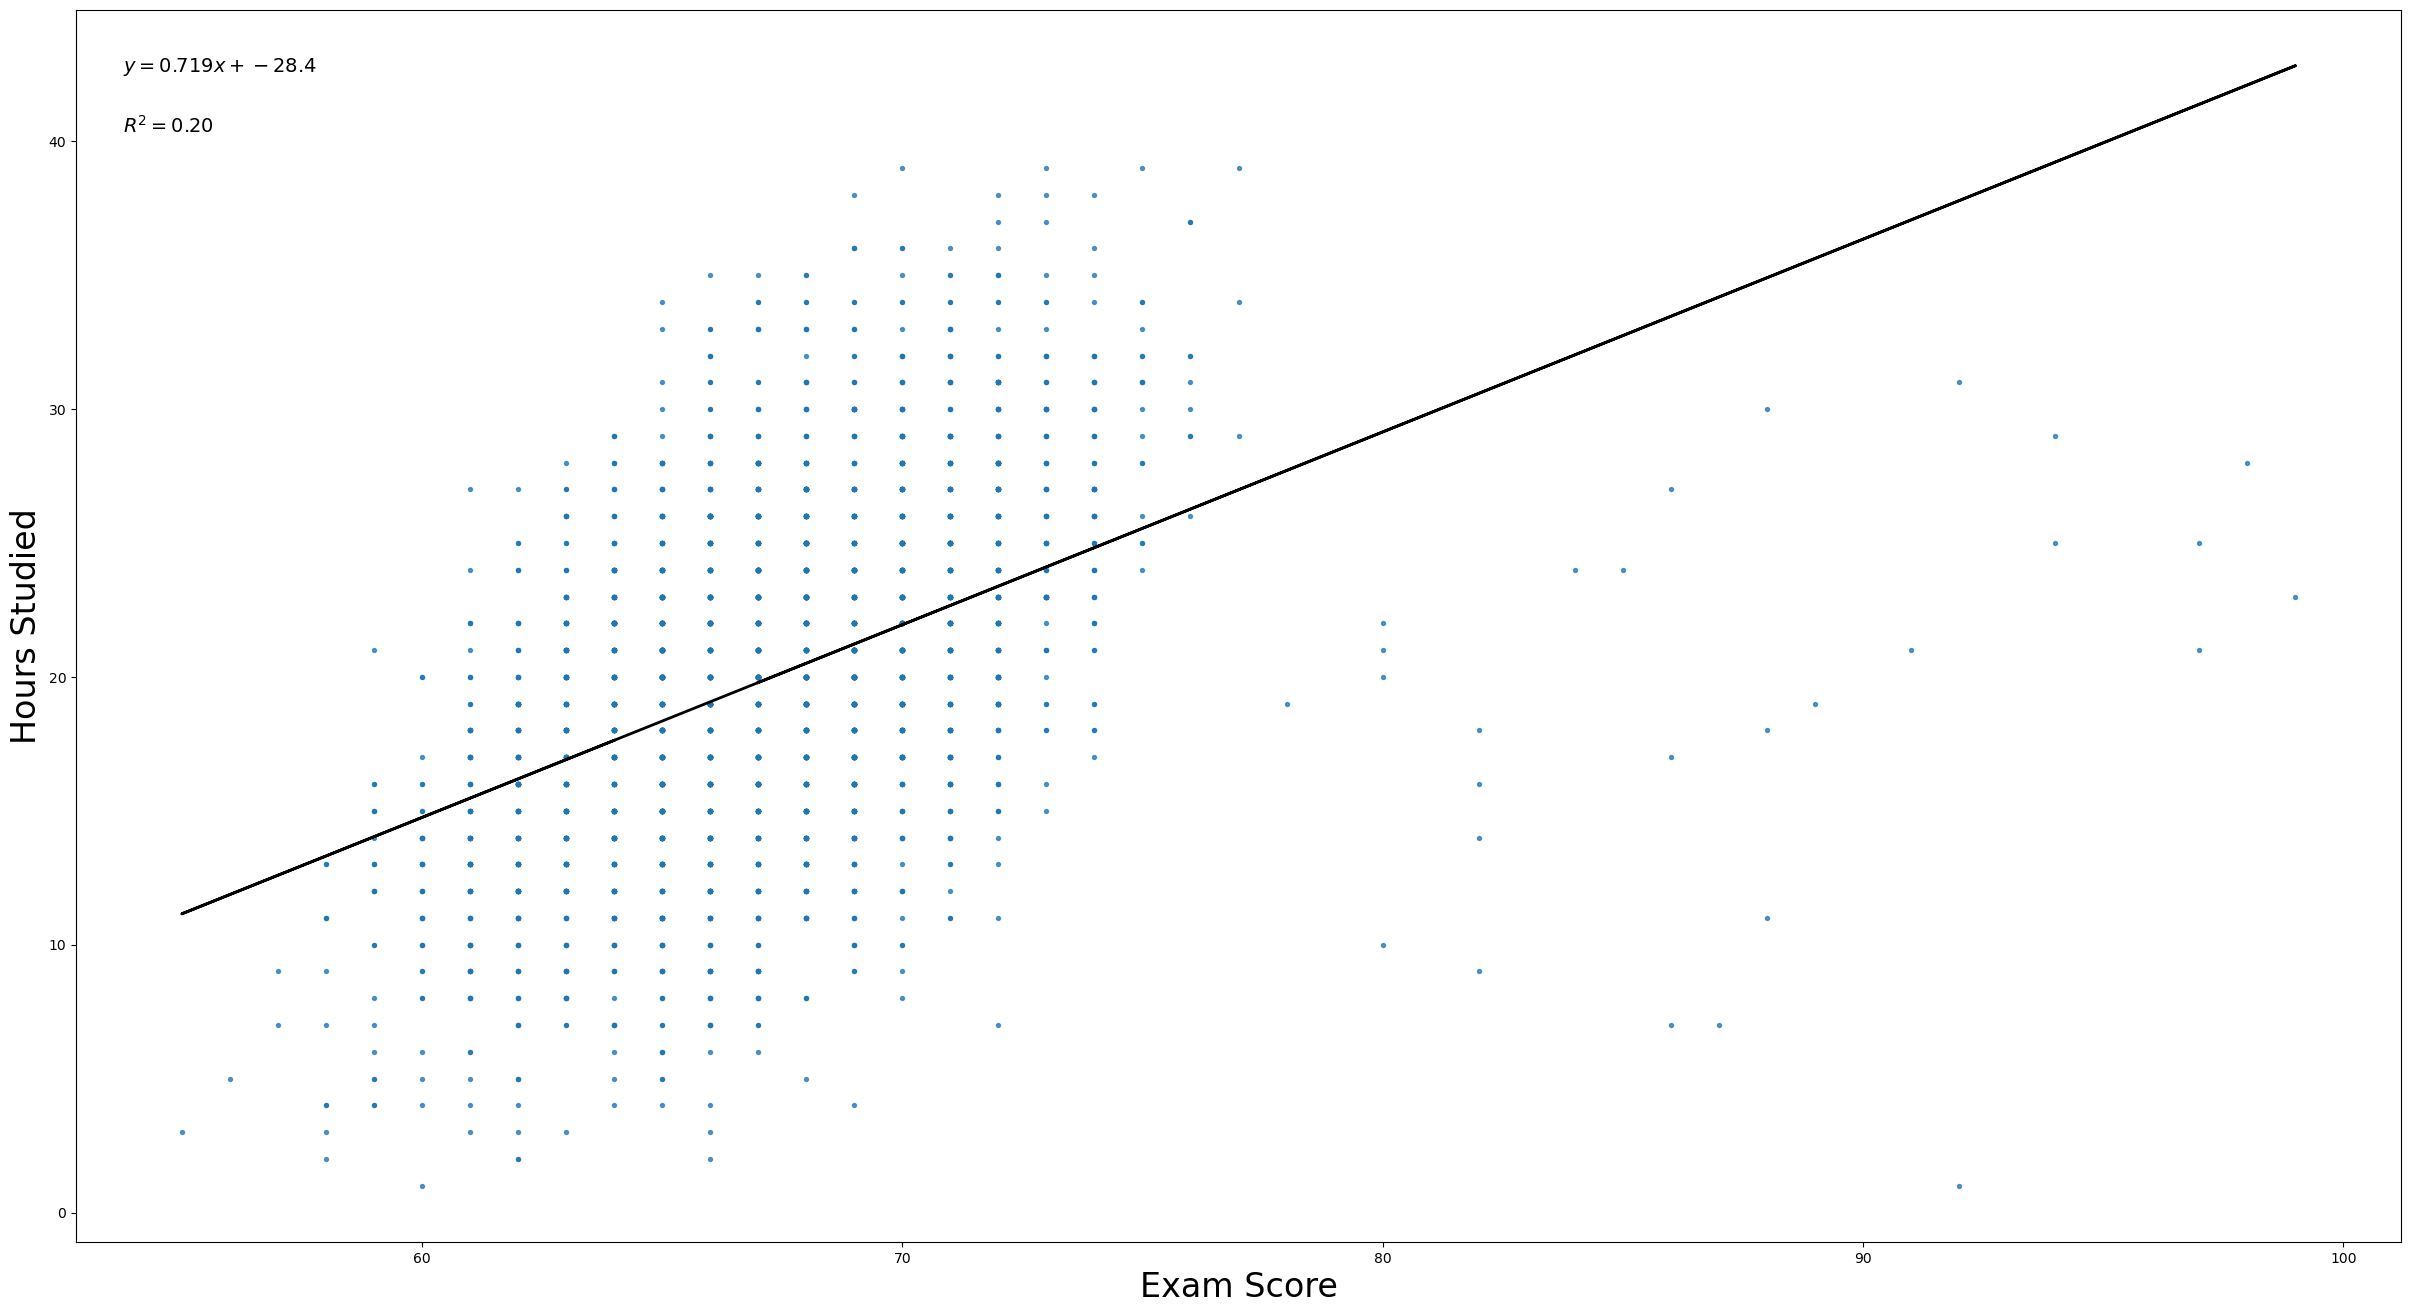

In [11]:
studied = students["Hours_Studied"]
score = students["Exam_Score"]

#filter for just one gender:
male = students[students['Gender'] == "Male"]
studied = male["Hours_Studied"]
score = male["Exam_Score"]

print("Number of Students", len())

plt.figure(figsize=(30,16))

plt.scatter(score, studied, s=8, alpha=0.75)

plt.xlabel("Exam Score", fontsize=24)
plt.ylabel("Hours Studied", fontsize=24)

# Use numpy to do a simple linear fit to time series data 
model = np.polyfit(score, studied, 1)
predicted = np.polyval(model, score)

plt.plot(score, predicted, linewidth=2, color='black')

slope = model[0]
intercept = model[1]
plt.annotate('$y=%3.5sx+%3.5s$'%(slope, intercept), xy=(0.02, 0.95), xycoords='axes fraction', fontsize=14)

r2 = np.corrcoef(studied, score)[0, 1]**2
plt.annotate('$R^2=%3.4s$'%(r2), xy=(0.02, 0.9), xycoords='axes fraction', fontsize=14)
